## HOUSE PRICE PREDICTION USING REGRESSION

### Import the necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno

### Load the Data

In [2]:
data = pd.read_csv("kc_house_data.csv")

In [3]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


### Visualize the data using Functions

In [4]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [10]:
data["waterfront"].unique()

array([0, 1], dtype=int64)

In [11]:
data["floors"].unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [13]:
data["condition"].unique()

array([3, 5, 4, 1, 2], dtype=int64)

### Visualizing with plots

In [15]:
%matplotlib inline

<AxesSubplot:>

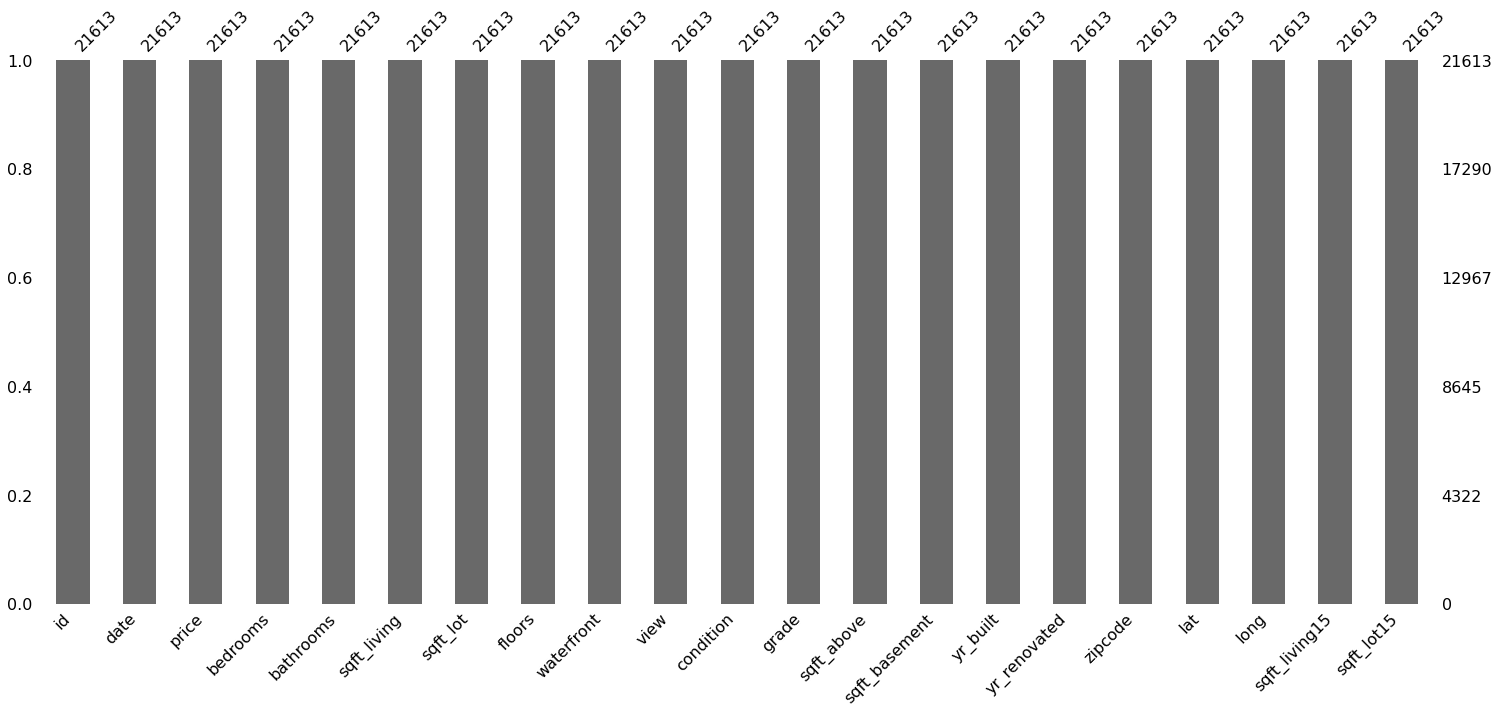

In [16]:
msno.bar(data)

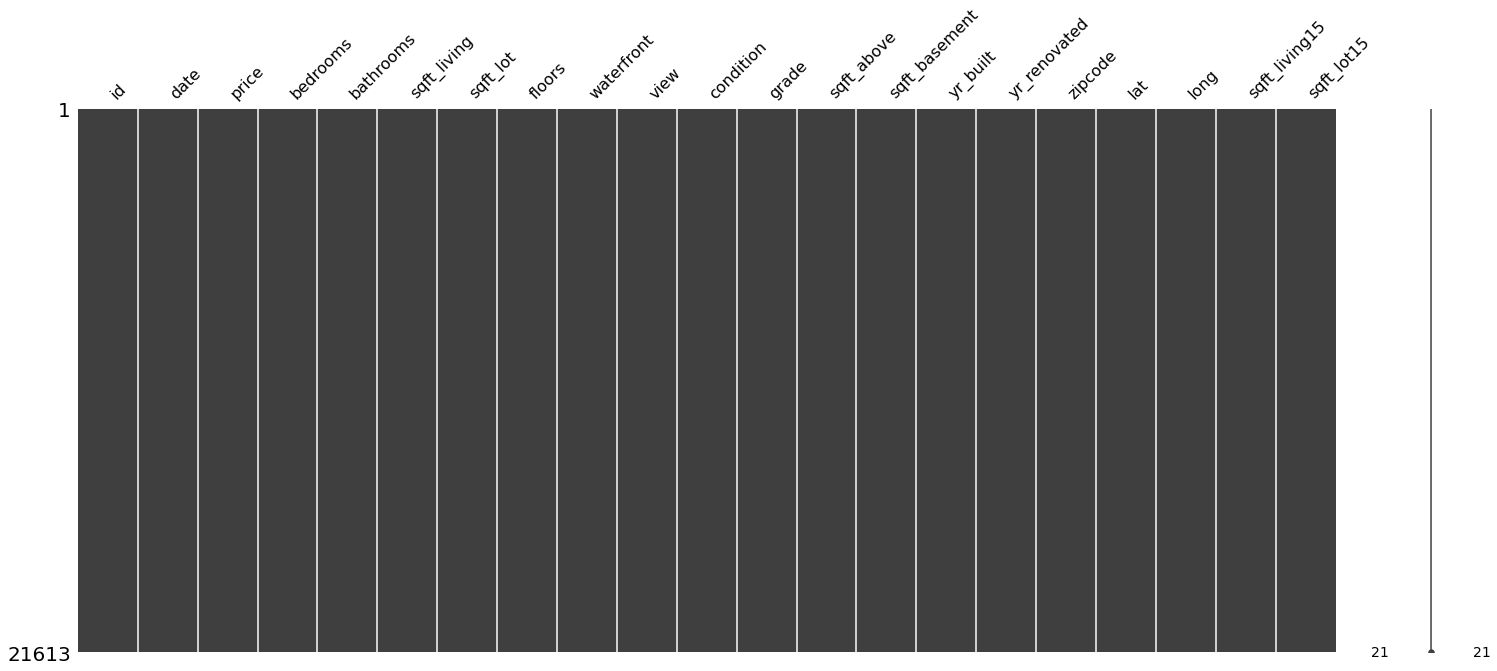

In [17]:
msno.matrix(data);

<AxesSubplot:>

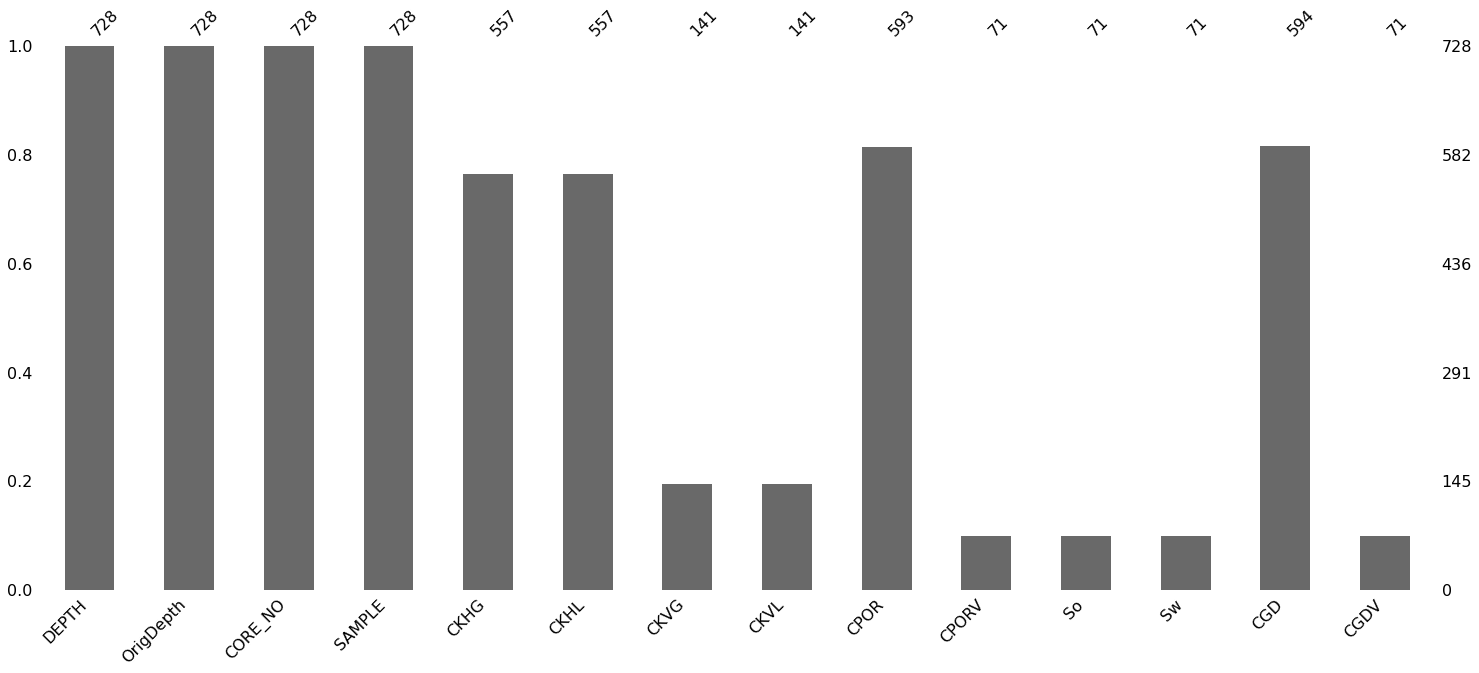

In [18]:
# Not the data i'm working with
well = pd.read_csv("15_9-19A-CORE.csv")
msno.bar(well)

<AxesSubplot:>

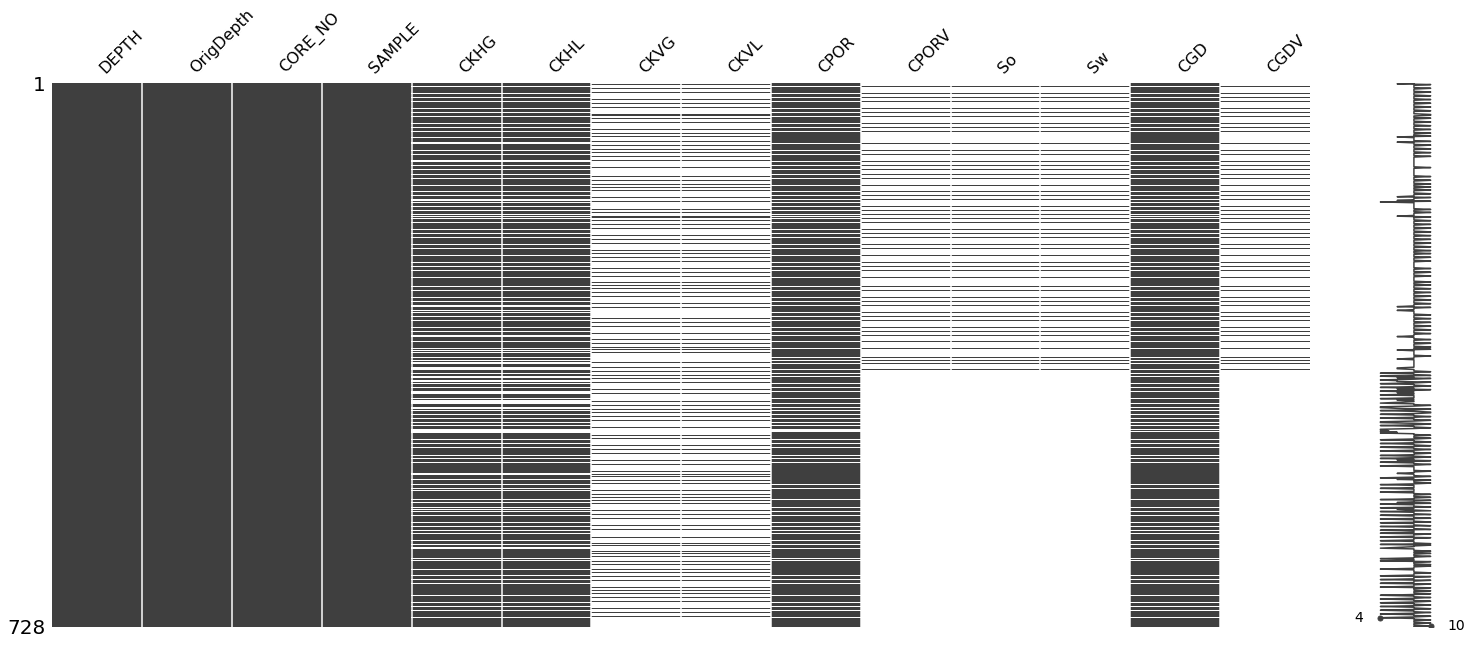

In [19]:
msno.matrix(well)

In [20]:
col= list(data.columns)
col

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

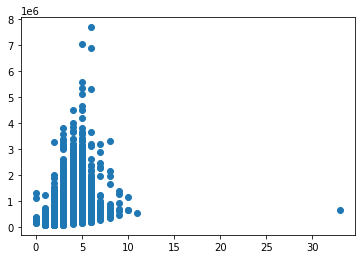

In [21]:
plt.figure()
plt.scatter(x="bedrooms", y="price", data=data)

{'whiskers': [<matplotlib.lines.Line2D at 0x23c7a1355a0>,
 'caps': [<matplotlib.lines.Line2D at 0x23c7a135b40>,
 'boxes': [<matplotlib.lines.Line2D at 0x23c7a1353f0>],
 'medians': [<matplotlib.lines.Line2D at 0x23c7a136110>],
 'fliers': [<matplotlib.lines.Line2D at 0x23c7a1363e0>],
 'means': []}

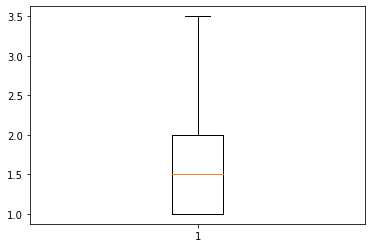

In [27]:
plt.boxplot(x="floors", data=data)

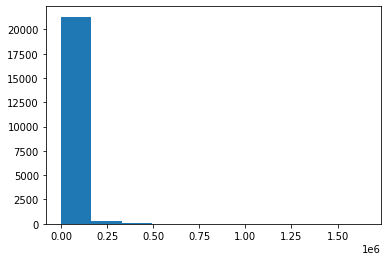

In [30]:
plt.hist(x="sqft_lot", data=data);

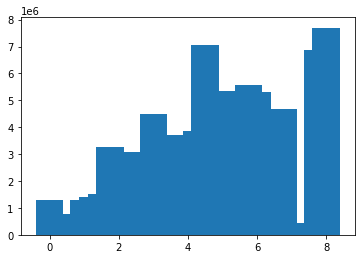

In [34]:
plt.bar(x="bathrooms", height="price", data=data);

C:\Users\CoE_Mobile\AppData\Local\Temp\ipykernel_4800\3161220493.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


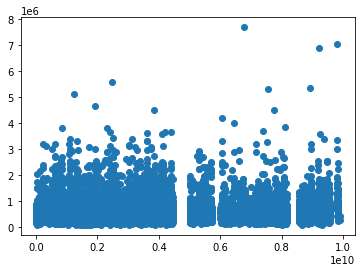

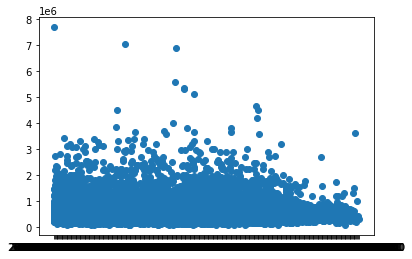

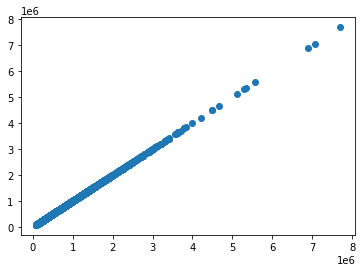

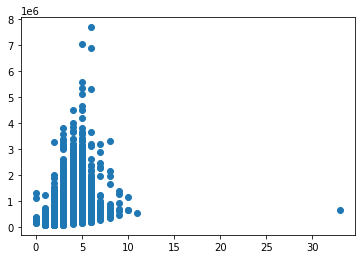

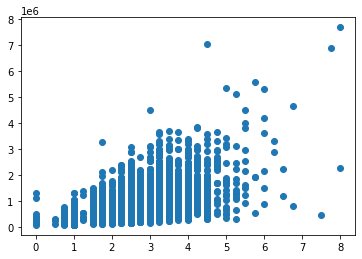

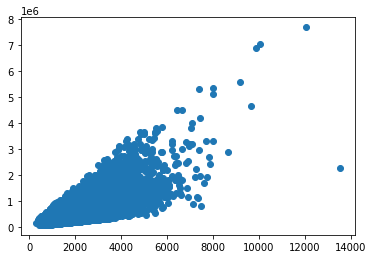

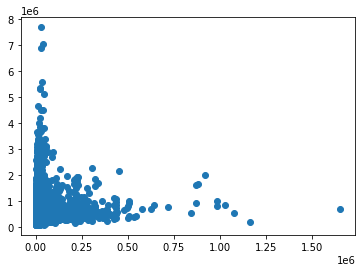

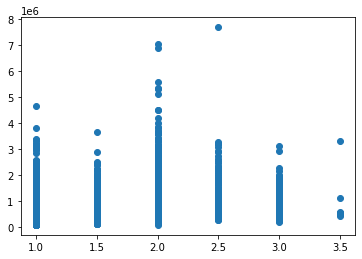

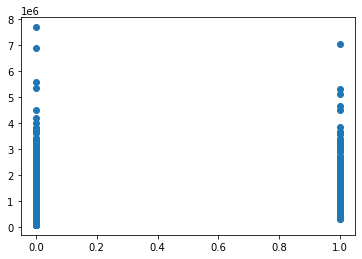

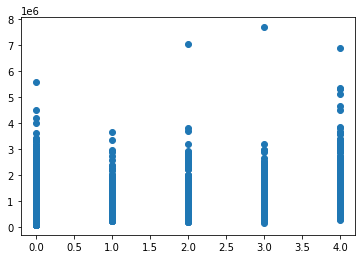

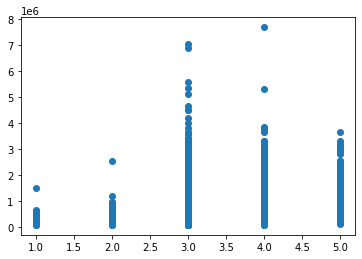

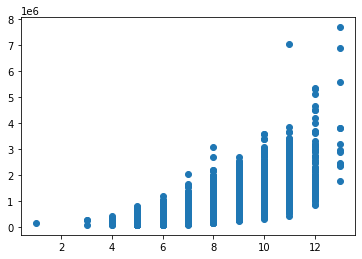

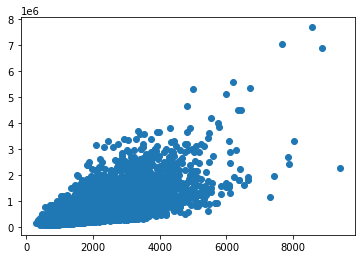

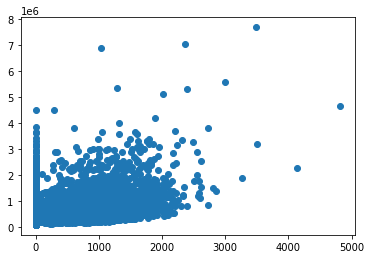

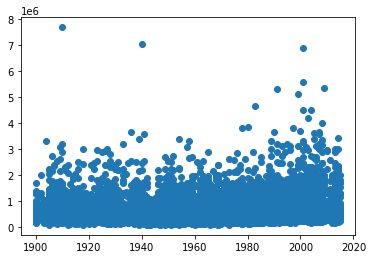

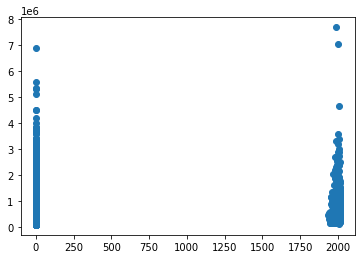

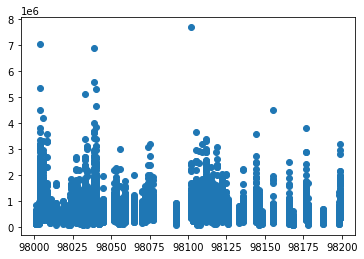

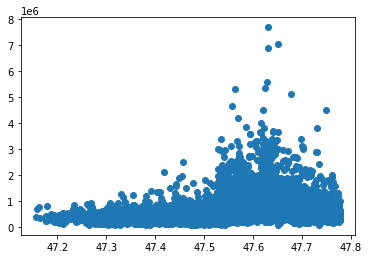

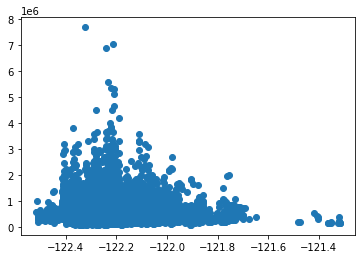

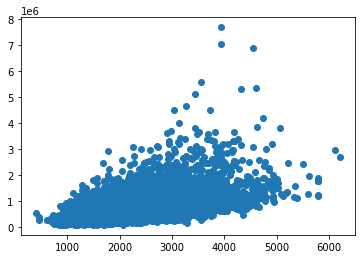

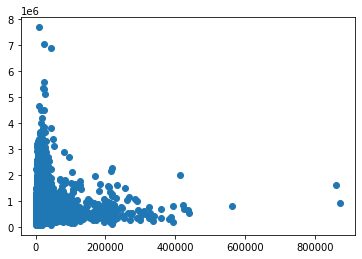

In [38]:
for c in col:
    plt.figure()
    plt.scatter(x=data[c], y=data["price"])

In [47]:
cols = col[4:]
cols

['bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

C:\Users\CoE_Mobile\AppData\Local\Temp\ipykernel_4800\2671210179.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


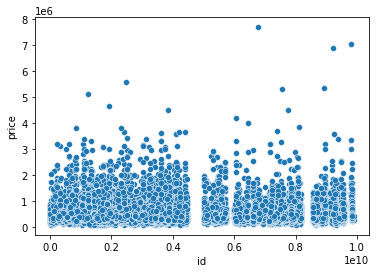

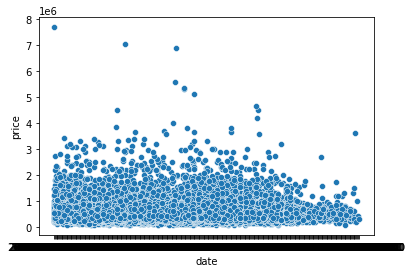

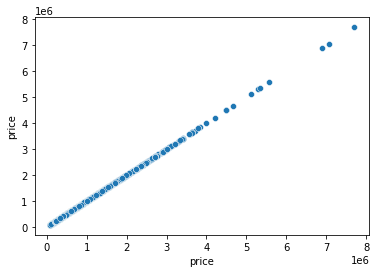

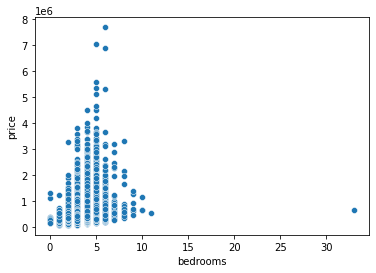

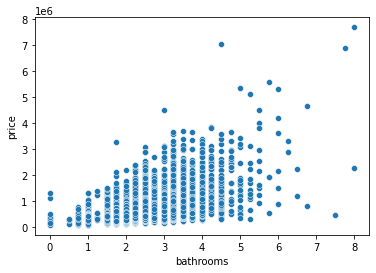

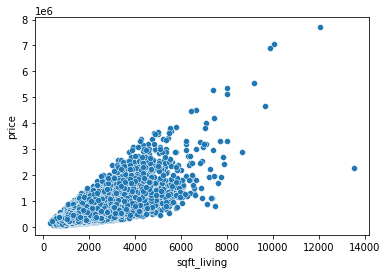

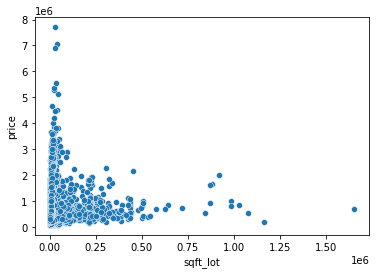

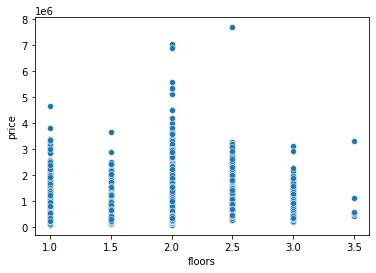

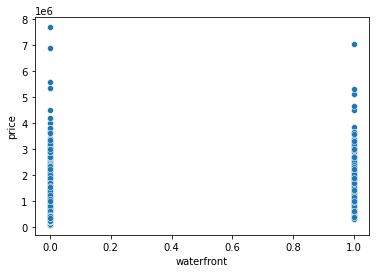

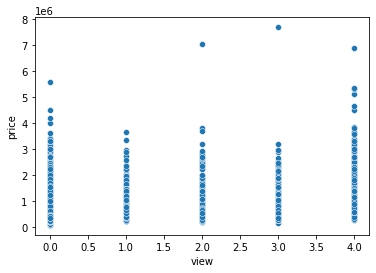

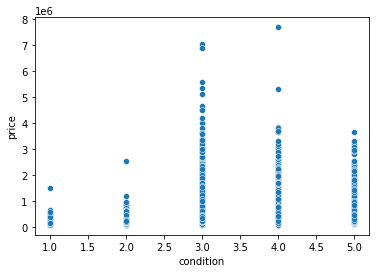

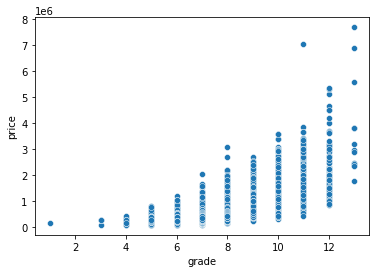

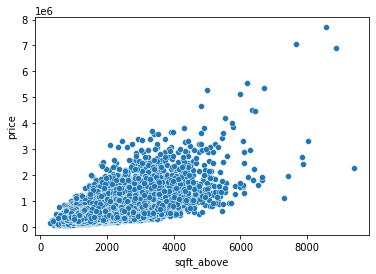

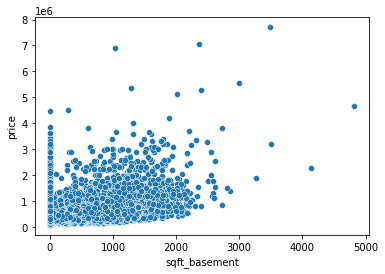

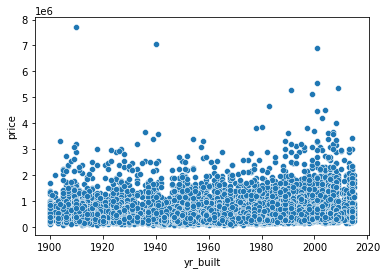

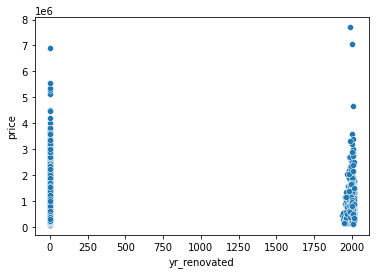

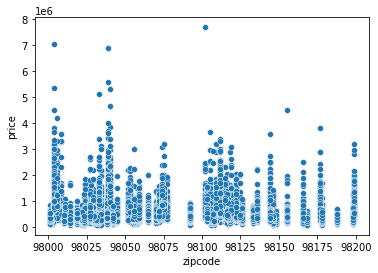

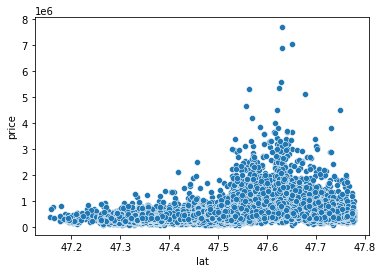

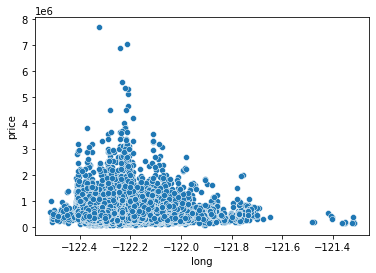

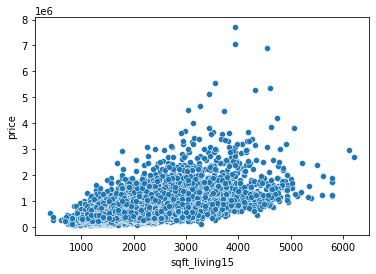

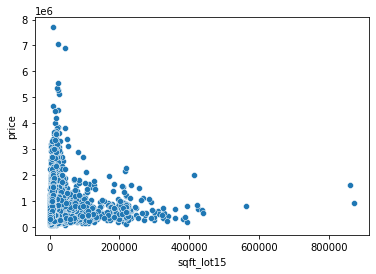

In [39]:
for c in col:
    plt.figure()
    sns.scatterplot(x=c, y="price", data=data)

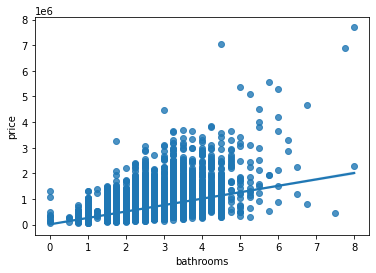

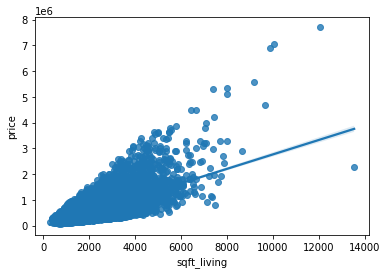

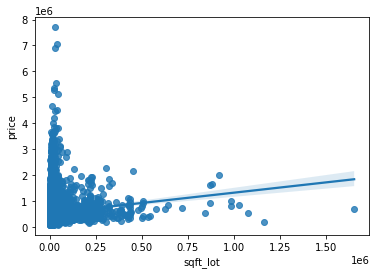

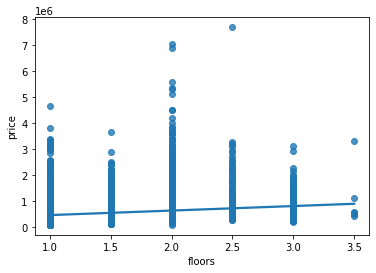

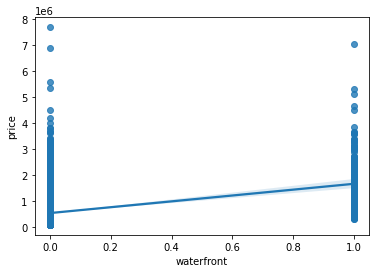

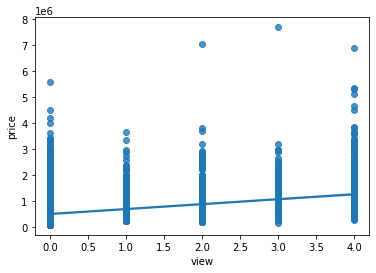

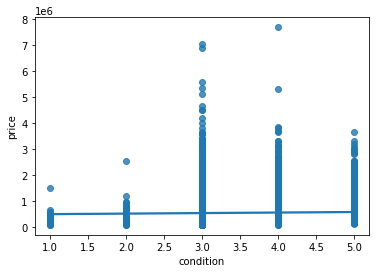

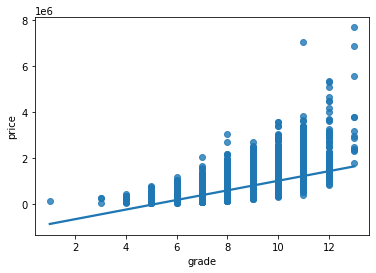

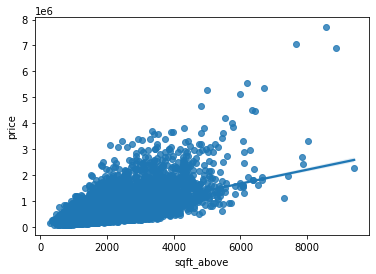

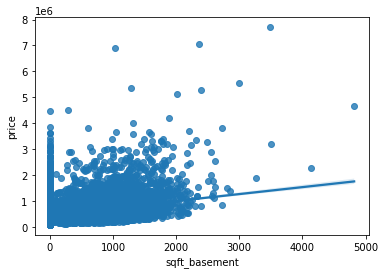

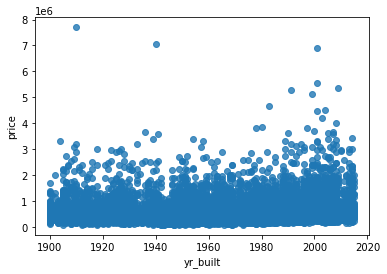

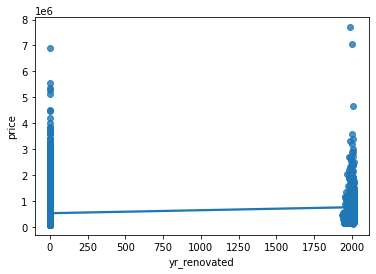

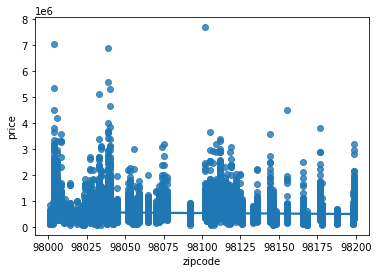

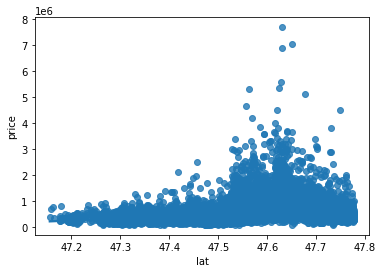

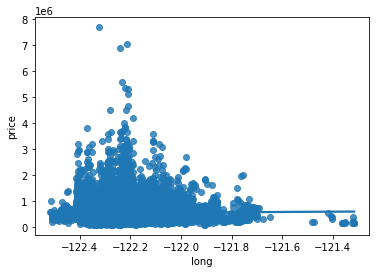

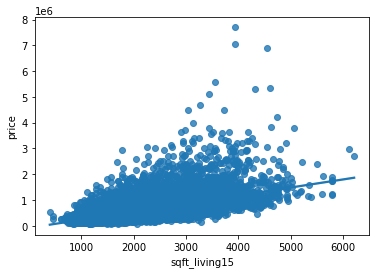

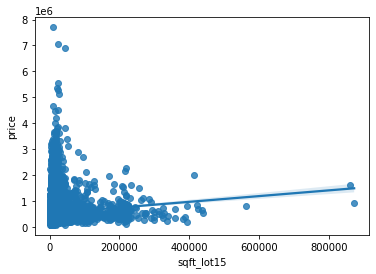

In [49]:
for c in cols:
    plt.figure()
    sns.regplot(x=c, y="price", data=data)

### Setting up required data for modelling
 `import algorithms`
 `split my data` 

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor

In [58]:
x = data[cols]
y = data["price"]

In [59]:
x

,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [56]:
# x.drop(["sqft_basement", "yr_renovated"], axis=1)

,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [60]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [61]:
np.random.seed(26)
x_test, x_train, y_test, y_train = train_test_split(x, y, test_size=0.2, random_state=True)

### Fitting and evaluating models using score

In [110]:
model_1 = RandomForestRegressor()
model_2 = DecisionTreeRegressor()
model_3 = Ridge()
model_4 = ExtraTreesRegressor()

In [111]:
np.random.seed(26)
model_1.fit(x_train, y_train)
model_1.score(x_test, y_test)

0.844880044343008

In [112]:
np.random.seed(26)
model_2.fit(x_train, y_train)
model_2.score(x_test, y_test)

0.5876416244186269

In [113]:
np.random.seed(26)
model_3.fit(x_train, y_train)
model_3.score(x_test, y_test)

0.6872905963903637

In [114]:
np.random.seed(26)
model_4.fit(x_train, y_train)
model_4.score(x_test, y_test)

0.8465692440542602

In [115]:
x1= x.drop(["sqft_basement", "yr_renovated"], axis=1)

In [116]:
x_test, x_train, y_test, y_train = train_test_split(x1, y, test_size=0.2, random_state=True)

In [118]:
np.random.seed(26)
model_1.fit(x_train, y_train)
model_1.score(x_test, y_test)

0.8460623298310307

In [119]:
np.random.seed(26)
model_2.fit(x_train, y_train)
model_2.score(x_test, y_test)

0.5964809432477078

In [120]:
np.random.seed(26)
model_3.fit(x_train, y_train)
model_3.score(x_test, y_test)

0.686755425281662

In [121]:
np.random.seed(26)
model_4.fit(x_train, y_train)
model_4.score(x_test, y_test)

0.8493300932969787

### Tuning the hyperparameters

In [75]:
model_2 = DecisionTreeRegressor(min_samples_split=5)

In [122]:
np.random.seed(26)
model_2.fit(x_train, y_train)
model_2.score(x_test, y_test)

0.5964809432477078

In [123]:
model_2 = DecisionTreeRegressor(min_samples_split=2)

In [124]:
np.random.seed(26)
model_2.fit(x_train, y_train)
model_2.score(x_test, y_test)

0.5964809432477078

### NOTE : 
The main parameters to adjust when using these methods is n_estimators and max_features.
The former is the number of trees in the forest. The larger the better, but also the longer it will take to compute. 
In addition, note that results will stop getting significantly better beyond a critical number of trees. 
The latter is the size of the random subsets of features to consider when splitting a node.
The lower the greater the reduction of variance, but also the greater the increase in bias.

In [104]:
np.random.seed(26)
model_4 = ExtraTreesRegressor(n_estimators=500)
x_test, x_train, y_test, y_train = train_test_split(x, y, test_size=0.2, random_state=True)

In [105]:
np.random.seed(26)
model_4.fit(x_train, y_train)
model_4.score(x_test, y_test)

0.8511725194068753

In [125]:
np.random.seed(26)
pred_1 = model_1.predict(x_test)

In [126]:
np.random.seed(26)
pred_2 = model_2.predict(x_test)

In [127]:
np.random.seed(26)
pred_3 = model_3.predict(x_test)

In [129]:
np.random.seed(26)
pred_4 = model_4.predict(x_test)

### Evaluating using Mean Absolute Error

In [130]:
from sklearn.metrics import mean_absolute_error

In [133]:
mae_1 = mean_absolute_error(y_test, pred_1)
mae_1

76372.47327646037

In [135]:
mae_2 = mean_absolute_error(y_test, pred_2)
mae_2

116407.2997686524

In [137]:
mae_3 = mean_absolute_error(y_test, pred_3)
mae_3

132816.44367423633

In [138]:
mae_4 = mean_absolute_error(y_test, pred_4)
mae_4

76739.361951417